In [1]:
#https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [27]:
#Importing Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Loading Dataset
df=pd.read_csv("bank-full.csv",sep=';')
#printing the head of the Dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


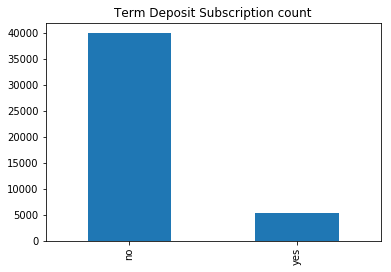

In [7]:
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Term Deposit Subscription count')

In [8]:
# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()

In [9]:
def heatMap(df, mirror):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=False, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot
    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        # Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=False, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
    # show plot
    plt.show()

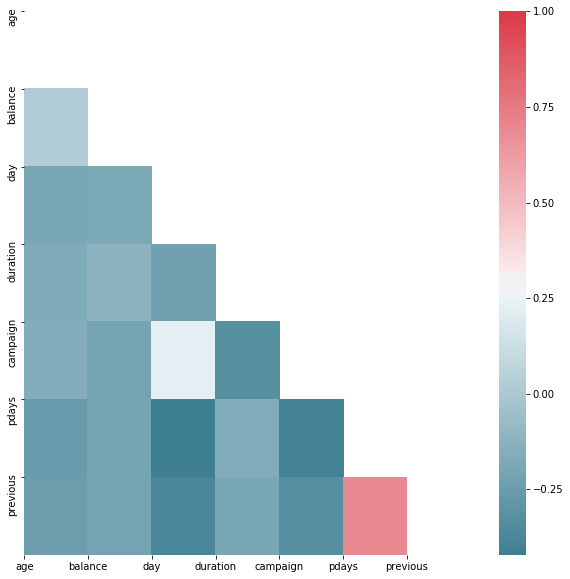

In [10]:
hmap = heatMap(corr_numeric,mirror='True')

In [11]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['default']=df['default'].map({'yes': 1, 'no': 0})
df['housing']=df['housing'].map({'yes': 1, 'no': 0})
df['loan']=df['loan'].map({'yes': 1, 'no': 0})

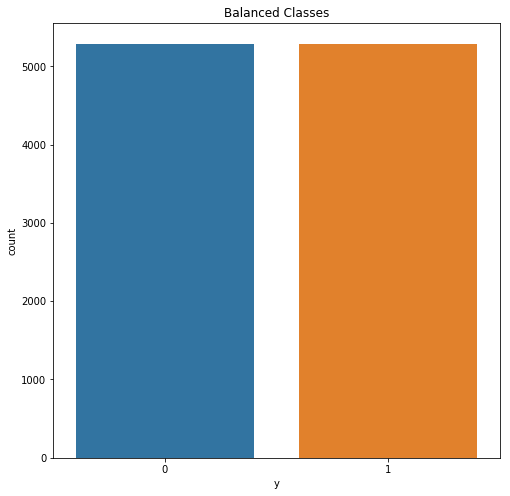

In [12]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
deposit_df = df.loc[df['y'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
no_deposit_df = df.loc[df['y'] == 0].sample(n=len(df[df['y']==1]),random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([deposit_df, no_deposit_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('y', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [13]:
len(normalized_df)

10578

In [14]:
#Splitting x and y
y=normalized_df[['y']].values.reshape(-1,)
X=normalized_df[['age','balance','pdays','previous','default','housing','loan','campaign']]
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,random_state=100)

In [15]:
def ROC_Plot(y,y_pred,label):
    '''Function to plot ROC characteristics of the model'''
    #Calculating True and False Positive Rate
    fpr, tpr, _ = roc_curve(y,  y_pred)
    
    #Caculating ROC Score
    auc = roc_auc_score(y, y_pred)
    
    #ROC Plot
    plt.plot(fpr,tpr,label=label+", auc="+str(auc))
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [16]:
def Model_Evaluation(model,X,y,label,class0,class1):
    '''Function to evaluate model performance'''
    #To Print the text in Bold
    start = "\033[1m"
    end = "\033[0;0m"
    print(start+ label + "ing Data - Model Evaluation" +end + "\n")
    #Fitting the trained Model
    y_pred = model.predict(X)

    #Calculating Accuracy
    print (label + "ing Accuracy is:", format((accuracy_score(y,y_pred)*100), '.2f'))

    #Printing Confusion Matrix
    print(start + "\n\t\t Confusion Matrix" + end)
    display(pd.DataFrame(
        confusion_matrix(y,y_pred),
        columns=[class0, class1],
        index=[class0, class1]
    ))

    #Printing Classification Report
    print(start + "\n\t\t Classification Report\n" + end)
    print(classification_report(y,y_pred))

    #Plotting ROC
    print(start + "\n\t\t\tROC Curve\n" + end)
    ROC_Plot(y,y_pred,label=label)

In [31]:
#SVM Linear Kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

SVM (Linear Kernel) Training Data - Model Evaluation

SVM (Linear Kernel) Training Accuracy is: 63.15

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1312,1338
Term Deposit Subscribed,611,2028



		 Classification Report

              precision    recall  f1-score   support

           0       0.68      0.50      0.57      2650
           1       0.60      0.77      0.68      2639

   micro avg       0.63      0.63      0.63      5289
   macro avg       0.64      0.63      0.62      5289
weighted avg       0.64      0.63      0.62      5289


			ROC Curve



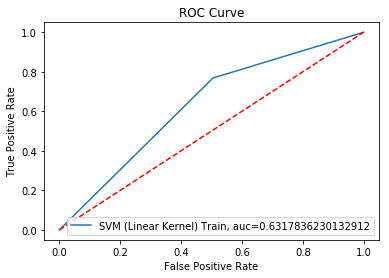

In [32]:
Model_Evaluation(svclassifier,X_train,y_train,label="SVM (Linear Kernel) Train",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

SVM (Linear Kernel) Training Data - Model Evaluation

SVM (Linear Kernel) Training Accuracy is: 62.58

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1325,1314
Term Deposit Subscribed,665,1985



		 Classification Report

              precision    recall  f1-score   support

           0       0.67      0.50      0.57      2639
           1       0.60      0.75      0.67      2650

   micro avg       0.63      0.63      0.63      5289
   macro avg       0.63      0.63      0.62      5289
weighted avg       0.63      0.63      0.62      5289


			ROC Curve



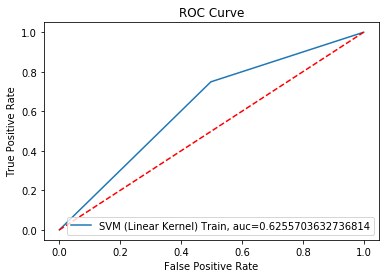

In [33]:
Model_Evaluation(svclassifier,X_test,y_test,label="SVM (Linear Kernel) Train",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

In [34]:
#SVM Gaussian Kernel
C=1.0
svclassifier_gauss = SVC(kernel='rbf',gamma=0.001,C=C)
svclassifier_gauss.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM (Gaussian Kernel) Training Data - Model Evaluation

SVM (Gaussian Kernel) Training Accuracy is: 73.72

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,2216,434
Term Deposit Subscribed,956,1683



		 Classification Report

              precision    recall  f1-score   support

           0       0.70      0.84      0.76      2650
           1       0.79      0.64      0.71      2639

   micro avg       0.74      0.74      0.74      5289
   macro avg       0.75      0.74      0.73      5289
weighted avg       0.75      0.74      0.73      5289


			ROC Curve



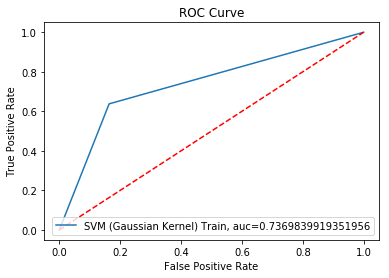

In [35]:
Model_Evaluation(svclassifier_gauss,X_train,y_train,label="SVM (Gaussian Kernel) Train",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

SVM (Gaussian Kernel) Testing Data - Model Evaluation

SVM (Gaussian Kernel) Testing Accuracy is: 61.47

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1803,836
Term Deposit Subscribed,1202,1448



		 Classification Report

              precision    recall  f1-score   support

           0       0.60      0.68      0.64      2639
           1       0.63      0.55      0.59      2650

   micro avg       0.61      0.61      0.61      5289
   macro avg       0.62      0.61      0.61      5289
weighted avg       0.62      0.61      0.61      5289


			ROC Curve



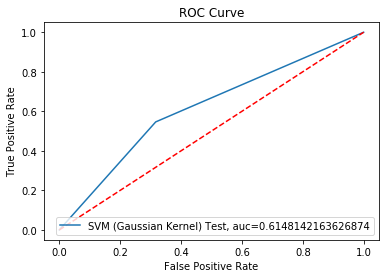

In [36]:
Model_Evaluation(svclassifier_gauss,X_test,y_test,label="SVM (Gaussian Kernel) Test",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

In [37]:
#SVM Sigmoid Kernel
svclassifier_sig = SVC(kernel='sigmoid',gamma=0.001,C=C)
svclassifier_sig.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM (Sigmoid Kernel) Training Data - Model Evaluation

SVM (Sigmoid Kernel) Training Accuracy is: 50.61

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1352,1298
Term Deposit Subscribed,1314,1325



		 Classification Report

              precision    recall  f1-score   support

           0       0.51      0.51      0.51      2650
           1       0.51      0.50      0.50      2639

   micro avg       0.51      0.51      0.51      5289
   macro avg       0.51      0.51      0.51      5289
weighted avg       0.51      0.51      0.51      5289


			ROC Curve



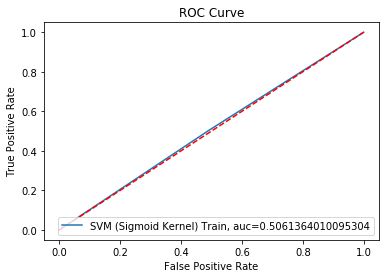

In [38]:
Model_Evaluation(svclassifier_sig,X_train,y_train,label="SVM (Sigmoid Kernel) Train",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

SVM (Sigmoid Kernel) Testing Data - Model Evaluation

SVM (Sigmoid Kernel) Testing Accuracy is: 51.50

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1383,1256
Term Deposit Subscribed,1309,1341



		 Classification Report

              precision    recall  f1-score   support

           0       0.51      0.52      0.52      2639
           1       0.52      0.51      0.51      2650

   micro avg       0.52      0.52      0.52      5289
   macro avg       0.52      0.52      0.52      5289
weighted avg       0.52      0.52      0.51      5289


			ROC Curve



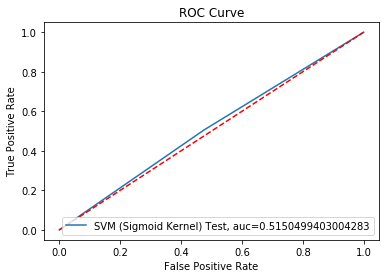

In [39]:
Model_Evaluation(svclassifier_sig,X_test,y_test,label="SVM (Sigmoid Kernel) Test",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

In [ ]:
#Cross Validated SVM
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svclassifier_grid = SVC()

grid_svm = GridSearchCV(svclassifier_grid, param_grid)
grid_svm.fit(X_train, y_train)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
print('Best score for SVM:', grid_svm.best_params_) 

In [ ]:
Model_Evaluation(grid_svm,X_train,y_train,label="SVM (Grid Search) Train",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

In [ ]:
Model_Evaluation(grid_svm,X_test,y_test,label="SVM (Grid Search) Test",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

In [ ]:
svc_cross = SVC(C= 1000, gamma= 0.0001, kernel= 'rbf')

accuracy = cross_val_score(svc_cross, X_train, y_train, scoring='accuracy', cv = 20)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

### Decision Trees

In [17]:
#Decision Tree with GINI Index
tree_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100, min_samples_leaf=5)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Decision Tree (entropy based tree) Training Data - Model Evaluation

Decision Tree (entropy based tree) Training Accuracy is: 81.07

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,2229,421
Term Deposit Subscribed,580,2059



		 Classification Report

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2650
           1       0.83      0.78      0.80      2639

   micro avg       0.81      0.81      0.81      5289
   macro avg       0.81      0.81      0.81      5289
weighted avg       0.81      0.81      0.81      5289


			ROC Curve



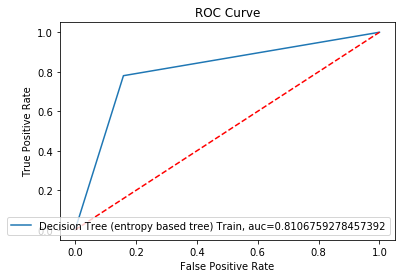

In [18]:
Model_Evaluation(tree_model,X_train,y_train,label="Decision Tree (entropy based tree) Train",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

Decision Tree (entropy based tree) Testing Data - Model Evaluation

Decision Tree (entropy based tree) Testing Accuracy is: 60.82

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1692,947
Term Deposit Subscribed,1125,1525



		 Classification Report

              precision    recall  f1-score   support

           0       0.60      0.64      0.62      2639
           1       0.62      0.58      0.60      2650

   micro avg       0.61      0.61      0.61      5289
   macro avg       0.61      0.61      0.61      5289
weighted avg       0.61      0.61      0.61      5289


			ROC Curve



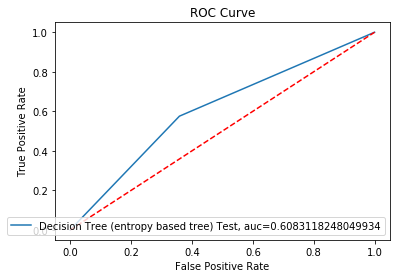

In [19]:
Model_Evaluation(tree_model,X_test,y_test,label="Decision Tree (entropy based tree) Test",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

In [20]:
#Decision Tree with Information
clf_entropy4 = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=5)
clf_entropy4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

Decision Tree (Max Depth=4) Training Data - Model Evaluation

Decision Tree (Max Depth=4) Training Accuracy is: 65.40

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1813,837
Term Deposit Subscribed,993,1646



		 Classification Report

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      2650
           1       0.66      0.62      0.64      2639

   micro avg       0.65      0.65      0.65      5289
   macro avg       0.65      0.65      0.65      5289
weighted avg       0.65      0.65      0.65      5289


			ROC Curve



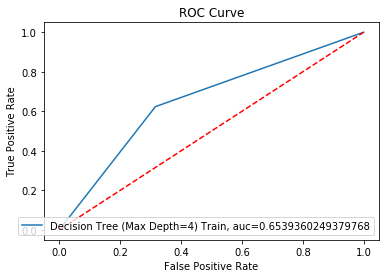

In [21]:
Model_Evaluation(clf_entropy4,X_train,y_train,label="Decision Tree (Max Depth=4) Train",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

Decision Tree (Max Depth=4) Testing Data - Model Evaluation

Decision Tree (Max Depth=4) Testing Accuracy is: 64.68

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1806,833
Term Deposit Subscribed,1035,1615



		 Classification Report

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2639
           1       0.66      0.61      0.63      2650

   micro avg       0.65      0.65      0.65      5289
   macro avg       0.65      0.65      0.65      5289
weighted avg       0.65      0.65      0.65      5289


			ROC Curve



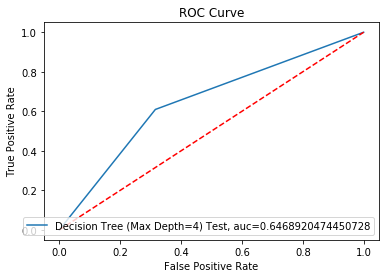

In [22]:
Model_Evaluation(clf_entropy4,X_test,y_test,label="Decision Tree (Max Depth=4) Test",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

In [23]:
#Ada boost
#Decision Tree with Information with Adaboost
clf_entropy_no_ada = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=5)
clf_entropy_no_ada.fit(X_train, y_train)

clf_entropy_ada = AdaBoostClassifier(base_estimator= clf_entropy_no_ada,n_estimators=400,learning_rate=1)
clf_entropy_ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          learning_rate=1, n_estimators=400, random_state=None)

Ada Boosted Decision Tree Training Data - Model Evaluation

Ada Boosted Decision Tree Training Accuracy is: 99.30

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,2636,14
Term Deposit Subscribed,23,2616



		 Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2650
           1       0.99      0.99      0.99      2639

   micro avg       0.99      0.99      0.99      5289
   macro avg       0.99      0.99      0.99      5289
weighted avg       0.99      0.99      0.99      5289


			ROC Curve



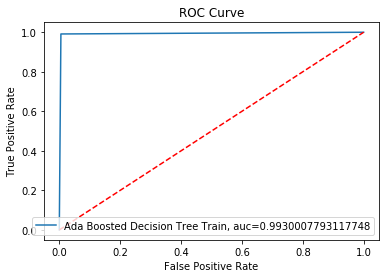

In [24]:
Model_Evaluation(clf_entropy_ada,X_train,y_train,label="Ada Boosted Decision Tree Train",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

Ada Boosted Decision Tree Testing Data - Model Evaluation

Ada Boosted Decision Tree Testing Accuracy is: 60.16

		 Confusion Matrix


,Term Deposit Not Subscribed,Term Deposit Subscribed
Term Deposit Not Subscribed,1599,1040
Term Deposit Subscribed,1067,1583



		 Classification Report

              precision    recall  f1-score   support

           0       0.60      0.61      0.60      2639
           1       0.60      0.60      0.60      2650

   micro avg       0.60      0.60      0.60      5289
   macro avg       0.60      0.60      0.60      5289
weighted avg       0.60      0.60      0.60      5289


			ROC Curve



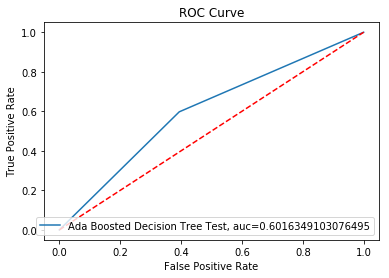

In [25]:
Model_Evaluation(clf_entropy_ada,X_test,y_test,label="Ada Boosted Decision Tree Test",class0='Term Deposit Not Subscribed',class1='Term Deposit Subscribed')

In [28]:
#Ada boost
#Decision Tree with Information with Adaboost
clf_entropy_no_ada = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=4, min_samples_leaf=5)

clf_entropy_ada_cross = AdaBoostClassifier(base_estimator= clf_entropy_no_ada,n_estimators=400,learning_rate=1)

accuracy = cross_val_score(clf_entropy_ada_cross, X_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.56710775 0.56521739 0.56899811 0.61814745 0.59546314 0.60869565
 0.60491493 0.61625709 0.60113422 0.59848485]
Accuracy of Model with Cross Validation is: 59.444205762731286
